In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 

from core.core import * 
from util.detector import * 
from util.estimator import * 
from util.modem import * 

from one_bit_receiver import OneBitReceiver
from bussgang_receiver import BussgangReceiver


Bad key text.latex.unicode in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You pr

____________________________________________________________________________________________________
trial:  0
snr:  -10 ser: 3.12e-01
snr:  -5 ser: 1.10e-01
snr:  0 ser: 1.94e-02
snr:  5 ser: 1.95e-03
snr:  10 ser: 2.50e-04
snr:  15 ser: 2.00e-04
snr:  20 ser: 0.00e+00
snr:  25 ser: 5.00e-05
____________________________________________________________________________________________________
trial:  1
snr:  -10 ser: 3.13e-01
snr:  -5 ser: 1.09e-01
snr:  0 ser: 1.82e-02
snr:  5 ser: 2.45e-03
snr:  10 ser: 4.00e-04
snr:  15 ser: 1.00e-04
snr:  20 ser: 5.00e-05
snr:  25 ser: 5.00e-05
____________________________________________________________________________________________________
trial:  2
snr:  -10 ser: 3.11e-01
snr:  -5 ser: 1.07e-01
snr:  0 ser: 1.71e-02
snr:  5 ser: 1.50e-03
snr:  10 ser: 2.50e-04
snr:  15 ser: 1.00e-04
snr:  20 ser: 0.00e+00
snr:  25 ser: 5.00e-05
____________________________________________________________________________________________________
trial:  3
snr:  -

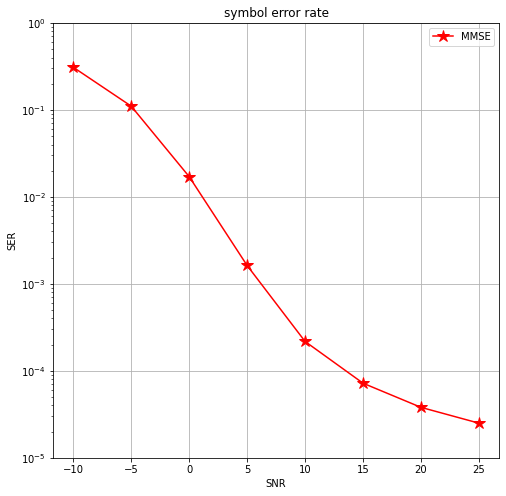

In [2]:
hparam_config = dict() 
hparam_config["K"] = 2
hparam_config["N"] = 16
hparam_config["M"] = 4 
hparam_config["T"] = int(1e4)
# hparam_config["estimator"] = z
hparam_config["detector"] = symbol_by_symbol
hparam_config["snr_min"] = -10
hparam_config["snr_max"] = 25
# zf_receiver = OneBitReceiver(hparam_config=hparam_config)

hparam_config["estimator"] = bmmse
bmmse_receiver = BussgangReceiver(hparam_config=hparam_config)

# sers_avg_zf = zf_receiver.run(trials=100, verbose=0) 
sers_avg_bmmse = bmmse_receiver.run(trials=100, verbose=2) 

plt.figure(figsize=(8, 8))
# plt.semilogy(zf_receiver.snr_list, sers_avg_zf, '-ro', label='ZF', markersize=12, fillstyle='none')
plt.semilogy(bmmse_receiver.snr_list, sers_avg_bmmse, '-r*', label='MMSE', markersize=12)

plt.grid()
plt.legend()
plt.xlabel("SNR")
plt.ylabel("SER")
plt.title("symbol error rate")
plt.yticks([1e-0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
plt.show()

In [3]:
snr_lst = np.arange(-10, 30, 5)
# sers_avg_mmse = sers_avg_mmse[:-1]
save_dir = './results/'
load_fname = "sers_avg_bmmse.npy"

In [4]:
np.save(save_dir + load_fname, sers_avg_bmmse) 

del sers_avg_bmmse

results from directory: 
	 ./results/sers_avg_1_bit_zero_forcing.npy
	 ./results/sers_avg_bzf.npy
	 ./results/sers_avg_bmmse.npy
	 ./results/sers_avg_mmse.npy
	 ./results/sers_avg_nML.npy
	 ./results/sers_avg_ml.npy
	 ./results/sers_avg_zf.npy
['sers_avg_1_bit_zero_forcing.npy', 'sers_avg_bzf.npy', 'sers_avg_bmmse.npy', 'sers_avg_mmse.npy', 'sers_avg_nML.npy', 'sers_avg_ml.npy', 'sers_avg_zf.npy']


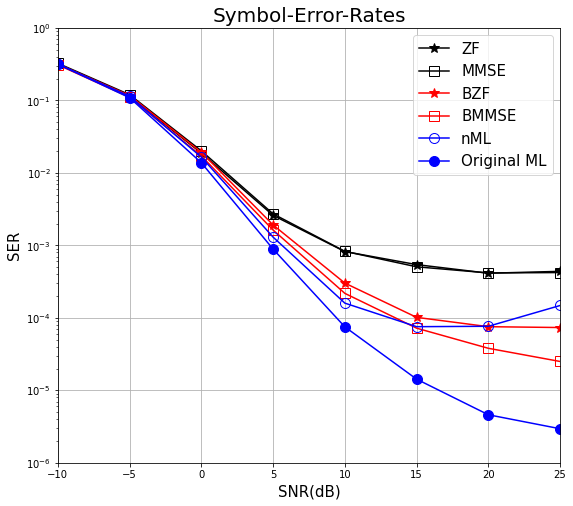

In [10]:
keys, results = load_all_results()
print(keys)

plt.figure(figsize=(9, 8))
# plt.semilogy(snr_lst[1:], results[2], '-s', )


plt.semilogy(snr_lst, results[6], '-k*', markersize=10, label="ZF")
plt.semilogy(snr_lst, results[3], '-ks', markersize=10, label="MMSE", fillstyle='none')
plt.semilogy(snr_lst, results[1], '-r*', markersize=10, label="BZF")
plt.semilogy(snr_lst, results[2], '-rs', markersize=10, label='BMMSE', fillstyle='none')
plt.semilogy(snr_lst, results[4], '-bo', markersize=10, label="nML", fillstyle='none')
plt.semilogy(snr_lst, results[5], '-bo', markersize=10, label="Original ML")

plt.xlim([-10, 25]); plt.ylim([1e-6, 1e0])
plt.xlabel("SNR(dB)", fontsize=15); plt.ylabel("SER", fontsize=15); plt.title("Symbol-Error-Rates", fontsize=20)
plt.grid(); plt.legend(fontsize=15)
plt.show()